# Heart Attack

## Data Exploration and Preparation

- Age: Age of the patient

- Sex: Sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp: Chest Pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

- trtbps: resting blood pressure (in mm Hg)

- chol: cholestoral in mg/dl fetched via BMI sensor

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- Target variable: 0 = less chance of heart attack, 1 = more chance of heart attack

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score

In [19]:
df = pd.read_csv('../content/heart.csv')

In [20]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [23]:
df[df.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [24]:
df = df.drop_duplicates(keep = 'first')

In [25]:
# check for outliers
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# check for outliers in the target column
df[(df['output'] != 0) & (df['output'] != 1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


## Data Distribution

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 164.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

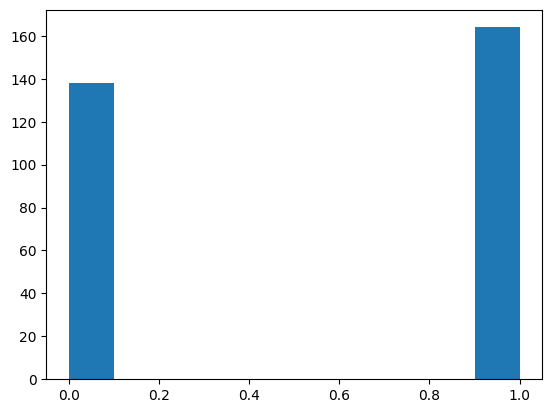

In [27]:
plt.hist(df['output'])

Hence, balanced dataset

Text(0.5, 1.0, 'Correlation Heatmap')

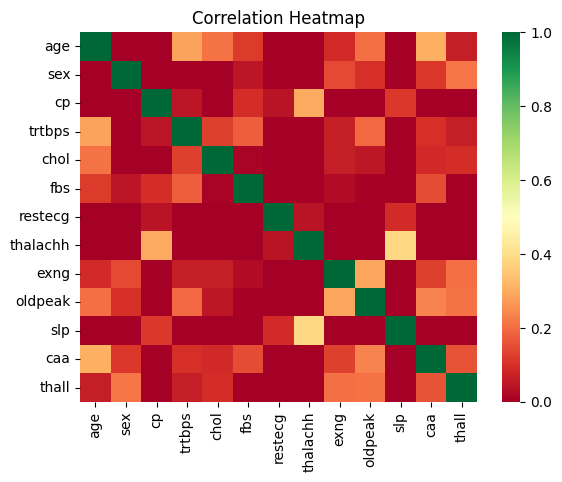

In [28]:
sns.heatmap(df.drop(columns = 'output').corr(), cmap = 'RdYlGn', vmin=0, vmax=1)
plt.title('Correlation Heatmap')

We can use this correlation graph to search for features which linearly depend on each other to prevent multicollinearity. However, there is none here.

## Feature Selection

### Split data

In [29]:
X = df.drop(columns = 'output')
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

### Using GridSearchCV to find best parameter for Lasso Regression

In [30]:
X_feature = X_train.values
y_feature = y_train.values
names = df.drop(columns = 'output').columns

params = {"alpha": np.linspace(0.00001, 10, 500)}

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X_train, y_train)
print(f"Best Alpha for Lasso Regression: {lasso_cv.best_params_['alpha']}")

Best Alpha for Lasso Regression: 1e-05


### Plot Feature Selection

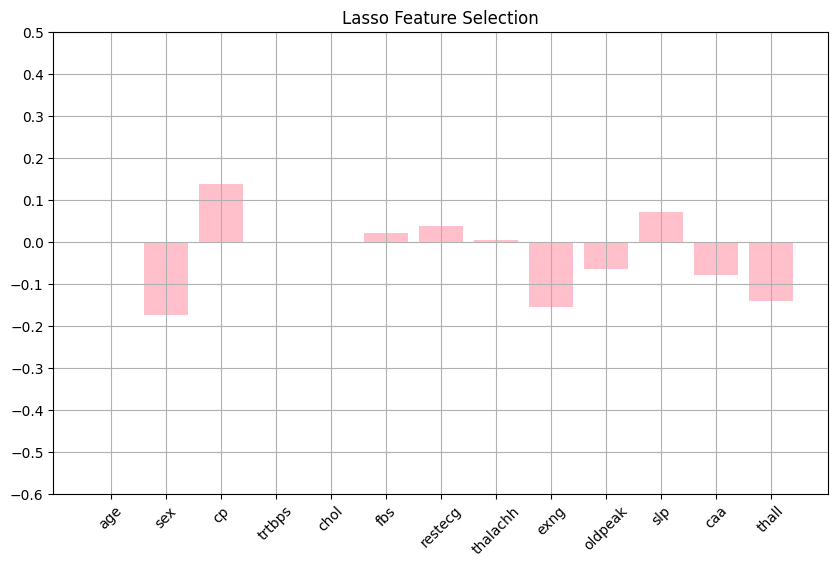

In [31]:
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_feature, y_feature)
lasso_coef = lasso.coef_

plt.figure(figsize=(10, 6))
plt.bar(names, lasso_coef, color = 'pink')
plt.yticks(np.arange(-0.6, 0.6, 0.10))
plt.grid()
plt.title('Lasso Feature Selection')
plt.xticks(rotation=45)
plt.show()

In [32]:
lasso_df = pd.DataFrame({'Feature': names, 'Lasso Coefficient': lasso_coef})
print(lasso_df.sort_values(by = 'Lasso Coefficient'))

     Feature  Lasso Coefficient
1        sex          -0.174284
8       exng          -0.155892
12     thall          -0.140346
11       caa          -0.079635
9    oldpeak          -0.065090
3     trtbps          -0.001229
4       chol          -0.000904
0        age           0.000190
7   thalachh           0.002946
5        fbs           0.019464
6    restecg           0.036528
10       slp           0.071456
2         cp           0.136677


#### After training and testing, I have found that dropping two features with lowest coefficient: age, chol works best for Logistic Regression and Random Forest. On the other hand, dropping three features: age, chol, thalachh works best for kNN. This is in term of recall score.

In [33]:
X_train2 = X_train.drop(columns = ['age', 'chol'])
X_test2 = X_test.drop(columns = ['age', 'chol'])

X_train3 = X_train.drop(columns = ['age', 'chol', 'thalachh'])
X_test3 = X_test.drop(columns = ['age', 'chol', 'thalachh'])

## Data Prediction
As we need to minimize the numbers of people who actually are in risk for heart attack but got predicted as no risk, I will be prioritizing reducing False Negative (FN) and recall score.

### Logistic Regression

In [34]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

log_reg = LogisticRegression()
log_grid = GridSearchCV(log_reg, param_grid, cv=kf, scoring='recall', n_jobs=-1)
log_grid.fit(X_train2, y_train)

best_log = log_grid.best_estimator_
best_log.fit(X_train2, y_train)

log_reg_cv_scores = cross_val_score(best_log, X_train2, y_train, cv = kf)

In [35]:
print(f'Cross Validation score for Logistic Regression: {log_reg_cv_scores}')
print(f'Mean Cross Validation score for Logistic Regression: {log_reg_cv_scores.mean():.4f}')

Cross Validation score for Logistic Regression: [0.8372093  0.88095238 0.80952381 0.85714286 0.83333333]
Mean Cross Validation score for Logistic Regression: 0.8436


In [36]:
# Confusion Matrix
best_log.fit(X_train2, y_train)
y_pred_log = best_log.predict(X_test2)

log_con = confusion_matrix(y_test, y_pred_log)
log_con = pd.DataFrame(log_con,
                     index=['True Negative', 'True Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
log_con

,Predicted Negative,Predicted Positive
True Negative,29,13
True Positive,3,46


In [37]:
# Classification Report
log_reg_report = classification_report(y_test, y_pred_log)
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        42
           1       0.78      0.94      0.85        49

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.82      0.82        91



### KNearestNeighborsClassifier model

#### Recall Score for various values of n for K-Nearest nerighbours

In [38]:
n_index = list(range(1,11))
cv_score_knn = [] # cross validation score for train dataset
test_knn = [] # accuracy score for test dataset
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3, y_train)

    # train
    cv_score_knn.append(cross_val_score(knn, X_train3, y_train, cv = kf, scoring = 'recall').mean()) # mean

    # test
    y_pred = knn.predict(X_test3)
    test_knn.append(recall_score(y_test, y_pred, average = 'macro'))

print(pd.DataFrame({
    'n_neighbor': n,
    'Train': cv_score_knn,
    'Test': test_knn}))

   n_neighbor     Train      Test
0           1  0.775390  0.731293
1           2  0.569946  0.721088
2           3  0.775111  0.750000
3           4  0.711139  0.768707
4           5  0.788359  0.784014
5           6  0.721247  0.755102
6           7  0.766054  0.750000
7           8  0.699666  0.751701
8           9  0.749749  0.770408
9          10  0.708640  0.751701


Text(0.5, 1.0, 'Accuracy of Test data for kNN model with varying n_neighbor')

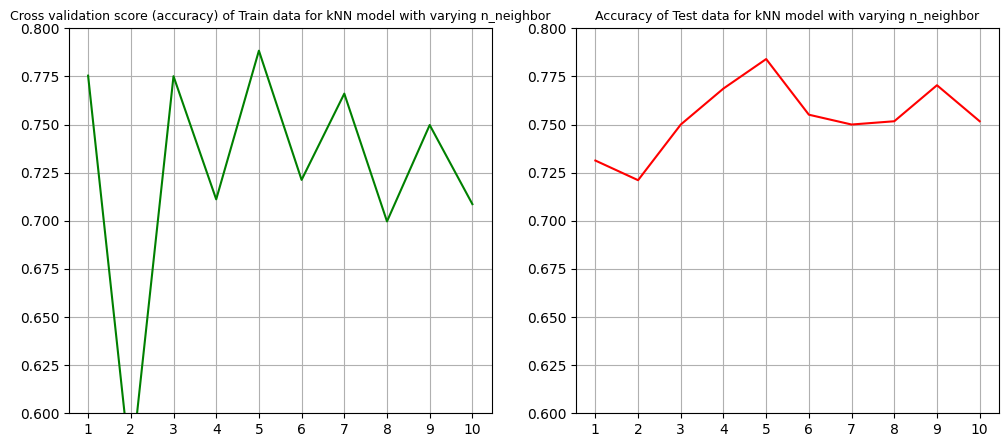

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(n_index, cv_score_knn, color = 'green')
plt.xticks(n)
plt.ylim([0.6, 0.8])
plt.grid()
plt.title('Cross validation score (accuracy) of Train data for kNN model with varying n_neighbor', fontsize = 9)

plt.subplot(1, 2, 2)
plt.plot(n_index, test_knn, color = 'red')
plt.ylim([0.6, 0.8])
plt.xticks(n)
plt.grid()
plt.title('Accuracy of Test data for kNN model with varying n_neighbor', fontsize = 9)

#### Therefore, I will use **n_neighbor = 5** for highest recall score of test dataset

In [40]:
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train3, y_train)

# Confusion Matrix
y_pred4 = knn4.predict(X_test3)

knn_con = confusion_matrix(y_test, y_pred)
knn_con_df = pd.DataFrame(knn_con,
                     index=['True Negative', 'True Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
knn_con_df

,Predicted Negative,Predicted Positive
True Negative,28,14
True Positive,8,41


In [41]:
# Classification Report
knn_report = classification_report(y_test, y_pred4)
print(knn_report)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.79      0.78      0.78        49

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### RandomForest

In [42]:
param_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

forest = RandomForestClassifier()
forest_grid = RandomizedSearchCV(estimator=forest, param_distributions=param_forest, n_iter=10, cv=kf, verbose=0, random_state=42, scoring = 'recall')
forest_grid.fit(X_train2, y_train)

C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2024, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='recall')

In [43]:
best_forest = forest_grid.best_estimator_
best_forest.fit(X_train2, y_train)

forest_cv_scores = cross_val_score(best_forest, X_train2, y_train, cv = kf)

In [44]:
print(f'Cross Validation score for Random Forest: {forest_cv_scores}')
print(f'Mean Cross Validation score for Random Forest: {forest_cv_scores.mean():.4f}')

Cross Validation score for Random Forest: [0.79069767 0.85714286 0.78571429 0.78571429 0.80952381]
Mean Cross Validation score for Random Forest: 0.8058


In [45]:
y_pred_forest = best_forest.predict(X_test2)

forest_con = confusion_matrix(y_test, y_pred_forest)
forest_con_df = pd.DataFrame(forest_con,
                     index=['True Negative', 'True Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
forest_con_df

,Predicted Negative,Predicted Positive
True Negative,30,12
True Positive,4,45


In [46]:
forest_report = classification_report(y_test, y_pred_forest)
print(forest_report)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        42
           1       0.79      0.92      0.85        49

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### Ploting Feature Importance

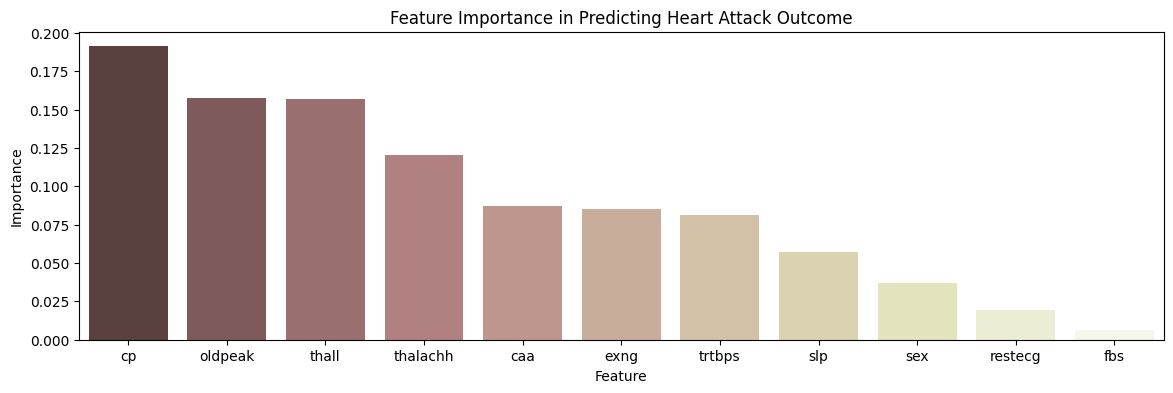

In [47]:
feature_importance = best_forest.feature_importances_
feature = X_train2.columns

# Create dataframe for visualization
feature_df = pd.DataFrame({
    'Feature': feature,
    'Importance': feature_importance
    }).sort_values(by = 'Importance', ascending = False)

palette = sns.color_palette('pink', n_colors = len(feature_df))
plt.figure(figsize=(14, 4))
sns.barplot(x = feature_df['Feature'], y = feature_df['Importance'], hue=feature_df['Feature'], palette=palette, legend=False)
plt.title('Feature Importance in Predicting Heart Attack Outcome')
plt.show()

This is not in line with lasso regression feature selection

#### The best models based on highest recall score (the ability of the classifier to find all the positive samples) and lowest false negative rate are Logistic Regression and Random Forest